<a href="https://colab.research.google.com/github/mirsazzathossain/CSE317-Lab/blob/main/Lab_3_Finding_Roots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### **Import necessary packages:**


2220769
Mustaqueem Alam
Section-1

In [73]:
import numpy as np
import matplotlib.pyplot as plt
import math

**Newton-Raphson method using finite difference derivatives:**

The Newton-Raphson method is an iterative method that uses the tangent line to the function to find the root. The method starts with an initial guess $x_0$ and then iterates to find a better approximation of the root. The iteration is given by the following formula:

$$x_{n+1} = x_n - \frac{f(x_n)}{f'(x_n)}$$

where $f(x)$ is the function whose root we are trying to find and $f'(x)$ is the derivative of $f(x)$. The iteration stops when the difference between two consecutive approximations is less than a given tolerance $\epsilon$.


You will implement the Newton-Raphson method using finite difference derivative to find the root of the following function.
$$f(x) = e^x − 2x^2$$

 You will implement the Newton-Raphson method using finite difference derivative in this part. We will use the following formulas to calculate the finite difference derivative:
>1. Forward difference derivative:
>$$f'(x) = \frac{f(x + h) - f(x)}{h}$$
>2. Backward difference derivative:
>$$f'(x) = \frac{f(x) - f(x - h)}{h}$$
>3. Central difference derivative:
>$$f'(x) = \frac{f(x + h) - f(x - h)}{2h}$$
where $h$ is the step size. You can choose any value for $h$. We will follow the following steps to implement the Newton-Raphson method using finite difference derivative:

##### **Step 1: Define the function and its derivatives:**
You have to define a function `f(x)` that takes a number $x$ as input and returns the value of $f(x) = e^x - 2x^2$. You also have to define the following functions that take a number $x$ as input and returns the value of the derivative of $f(x)$ using the corresponding finite difference derivative formula:
>1. `fprime_forward(x, h)`
>2. `fprime_backward(x, h)`
>3. `fprime_central(x, h)`

In [74]:
  def f(x):
    return np.exp(x) - 2 * x**2

  def fprime_forward(x, h):
    return (f(x + h) - f(x)) / h

  def fprime_backward(x, h):
    return (f(x) - f(x - h)) / h

  def fprime_central(x, h):
    return (f(x + h) - f(x - h)) / (2 * h)

##### **Step 2: Define initial guess, tolerance, and step size:**
You have to define a variable `x_0` that stores the initial guess and a variable `epsilon` that stores the tolerance. You can choose any value for `x_0`. Use `epsilon = 0.001` for this assignment. You also have to define a variable `h` that stores the step size. We will use `h = 0.01` for this assignment.

In [75]:
x_0 = 0 #stores the initial guess
epsilon = 0.001 #stores the tolerance
h = 0.01

##### **Step 3: Implement the Newton-Raphson method using finite difference derivative:**
Write the following function that takes the initial guess, tolerance, and step size as inputs and returns the root of the function using the Newton-Raphson method using finite difference derivative:
>1. `nr_fordiff(x_0, epsilon, h)` for forward difference derivative
>2. `nr_bakdiff(x_0, epsilon, h)` for backward difference derivative
>3. `nr_cendiff(x_0, epsilon, h)` for central difference derivative

Each function should loop through the following steps until the relative error between two consecutive approximations is less than the tolerance $\epsilon$:

  1. Calculate the next approximation of the root using the formula given above.
  2. Store the current approximation in a list.
  3. Calculate the relative error between the current approximation and the previous approximation.
  4. Print the iteration number, the current approximation, $f(current approximation)$, and the error as shown in the example below.

  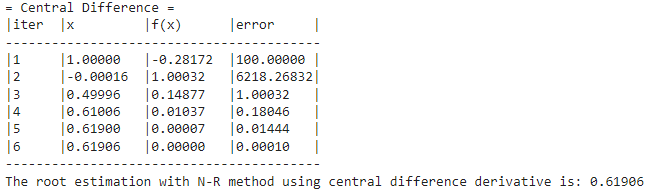
  
  5. Update the current approximation to be the next approximation.

The function should return the list of approximations.

In [76]:
def nr_fordiff(x_0, h, epsilon):
    error = 100
    iter = 1
    x_new = x_0
    c_approx = np.array([x_new])

    print(" Forward Difference = ")
    print("|{:<6}|{:<10}|{:<10}|{:<10}|".format("iter", "x", "f(x)", "error"))
    print("-"*41)
    print("|{:<6}|{:<10.5f}|{:<10.5f}|{:<10.5f}|".format(iter, np.around(x_new, 5), np.around(f(x_new), 5), np.around(error, 5)))

    while error > epsilon:
        iter += 1
        x_new = x_0 - f(x_0)/fprime_forward(x_0, h)
        c_approx = np.append(c_approx, x_new)
        error = abs(x_new-x_0)/abs(x_new)
        print("|{:<6}|{:<10.5f}|{:<10.5f}|{:<10.5f}|".format(iter, np.around(x_new, 5), np.around(f(x_new), 5), np.around(error, 5)))
        x_0 = x_new

    print("-"*41)
    print("The root estimation with N-R method using central difference derivative is: {:.5f}".format(x_new))
    return c_approx




def nr_bakdiff(x_0, h, epsilon):
    error = 100
    iter = 1
    x_new = x_0
    c_approx = np.array([x_new])

    print("Backward Difference =")
    print("|{:<6}|{:<10}|{:<10}|{:<10}|".format("iter", "x", "f(x)", "error"))
    print("-"*41)
    print("|{:<6}|{:<10.5f}|{:<10.5f}|{:<10.5f}|".format(iter, np.around(x_new, 5), np.around(f(x_new), 5), np.around(error, 5)))

    while error > epsilon:
        iter += 1

        x_new = x_0 - f(x_0)/fprime_backward(x_0, h)
        c_approx = np.append(c_approx, x_new)

        error = abs(x_new-x_0)/abs(x_new)
        print("|{:<6}|{:<10.5f}|{:<10.5f}|{:<10.5f}|".format(iter, np.around(x_new, 5), np.around(f(x_new), 5), np.around(error, 5)))
        x_0 = x_new

    print("-"*41)
    print("The root estimation with N-R method using central difference derivative is: {:.5f}".format(x_new))

    return c_approx


def nr_cendiff(x_0, h, epsilon):
    error = 100
    iter = 1
    x_new = x_0
    c_approx = np.array([x_new])
    print("Central Difference")
    print("|{:<6}|{:<10}|{:<10}|{:<10}|".format("iter", "x", "f(x)", "error"))
    print("-"*41)
    print("|{:<6}|{:<10.5f}|{:<10.5f}|{:<10.5f}|".format(iter, np.around(x_new, 5), np.around(f(x_new), 5), np.around(error, 5)))

    while error > epsilon:
        iter += 1
        x_new = x_0 - f(x_0)/fprime_central(x_0, h)
        c_approx = np.append(c_approx, x_new)

        error = abs(x_new-x_0)/abs(x_new)

        print("|{:<6}|{:<10.5f}|{:<10.5f}|{:<10.5f}|".format(iter, np.around(x_new, 5), np.around(f(x_new), 5), np.around(error, 5)))

        x_0 = x_new

    print("-"*41)
    print("The root estimation with N-R method using central difference derivative is: {:.5f}".format(x_new))

    return c_approx

##### **Step 4: Plot the approximations:**
Use the function you wrote in the previous step to get the list of approximations. Then, plot the list of approximations against the number of iterations for all three methods. The x-axis should be the number of iterations and the y-axis should be the approximation. The subplot should have legends to distinguish between the three methods. Also, plot the original function in another subplot. The plot should look like the example below:

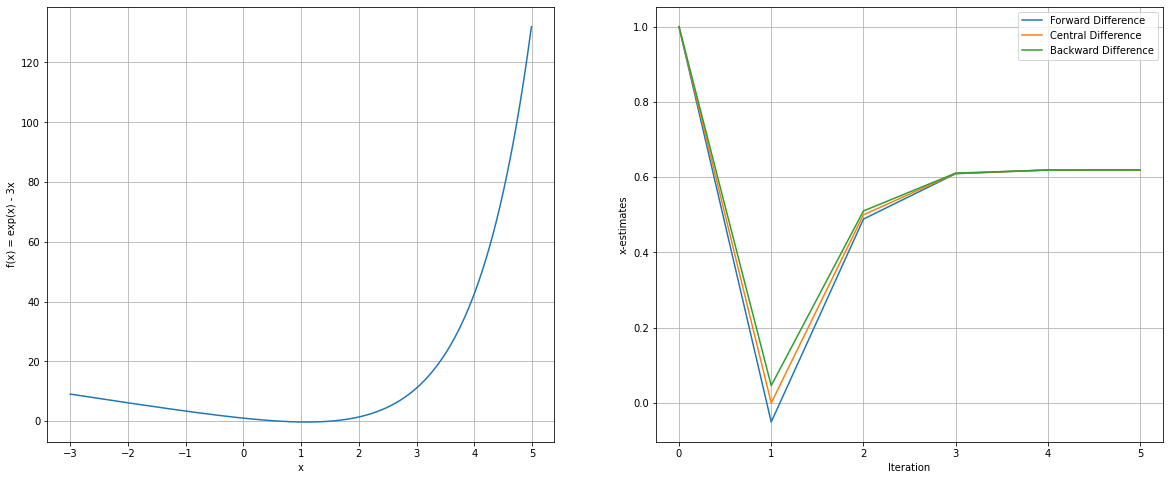

 Forward Difference = 
|iter  |x         |f(x)      |error     |
-----------------------------------------
|1     |0.00000   |1.00000   |100.00000 |
|2     |-1.01521  |-1.69898  |1.00000   |
|3     |-0.62952  |-0.25973  |0.61268   |
|4     |-0.54390  |-0.01117  |0.15742   |
|5     |-0.53982  |0.00004   |0.00755   |
|6     |-0.53984  |-0.00000  |0.00003   |
-----------------------------------------
The root estimation with N-R method using central difference derivative is: -0.53984
Central Difference
|iter  |x         |f(x)      |error     |
-----------------------------------------
|1     |0.00000   |1.00000   |100.00000 |
|2     |-0.99998  |-1.63205  |1.00000   |
|3     |-0.62633  |-0.25003  |0.59657   |
|4     |-0.54408  |-0.01167  |0.15117   |
|5     |-0.53985  |-0.00003  |0.00784   |
|6     |-0.53984  |-0.00000  |0.00002   |
-----------------------------------------
The root estimation with N-R method using central difference derivative is: -0.53984
Backward Difference =
|iter  |x 

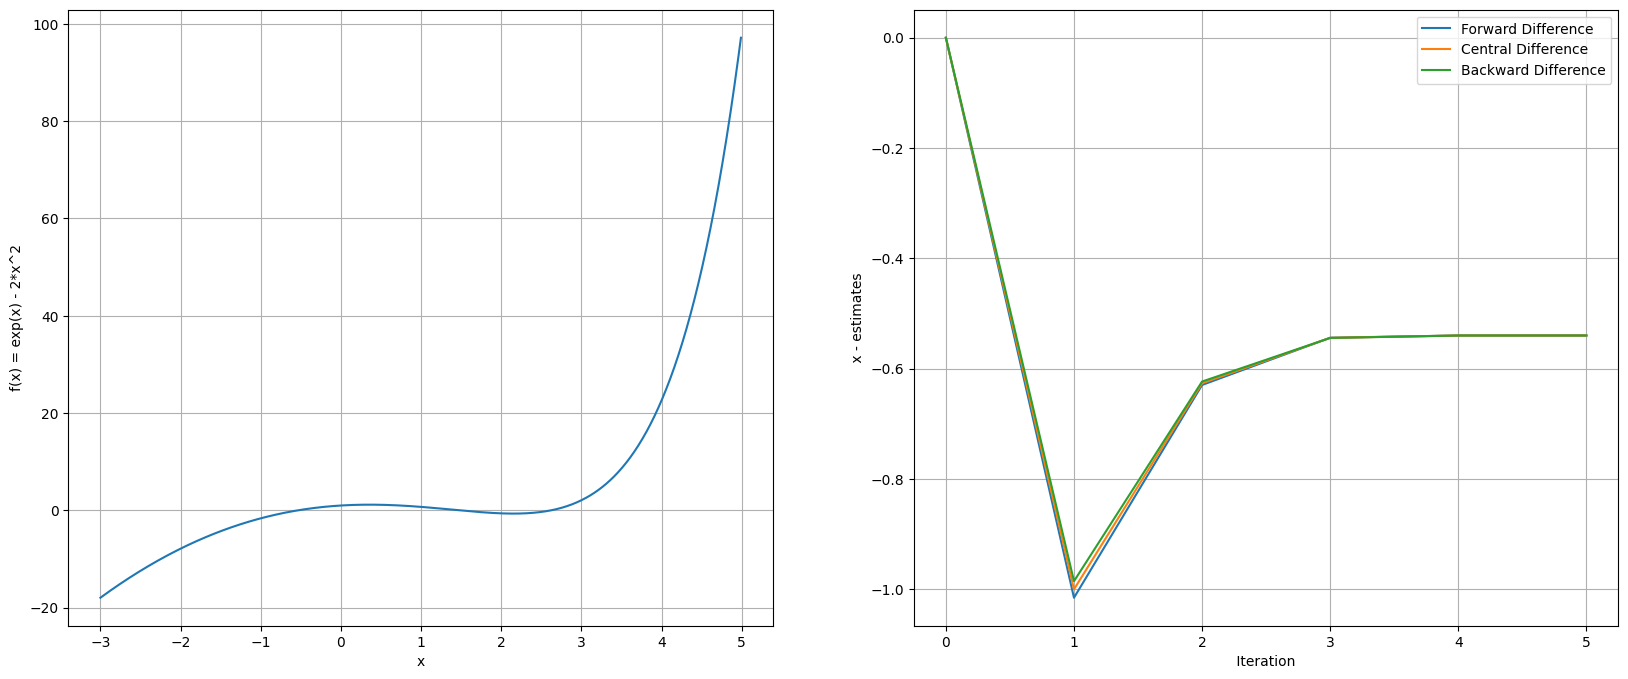

In [77]:
#sequence of numbers
x = np.arange(-3  , 5 , 0.01)
y = f(x)
#Use of prev functions
x_fordiff = nr_fordiff(x_0, h, epsilon)
x_cendiff = nr_cendiff(x_0, h, epsilon)
x_backdiff = nr_backdiff(x_0, h, epsilon)
#plot
plt.figure(figsize=(20,8))
plt.subplot(1, 2, 1)
plt.plot(x, y, label="f(x)")
plt.xlabel("x")
plt.ylabel("f(x) = exp(x) - 2*x^2")
plt.grid(True)
plt.subplot(1, 2, 2)
plt.plot(np.arange(0, len(x_fordiff)), x_fordiff, label="Forward Difference")
plt.plot(np.arange(0, len(x_cendiff)), x_cendiff, label="Central Difference")
plt.plot(np.arange(0, len(x_backdiff)), x_backdiff, label="Backward Difference")
plt.xlabel(" Iteration ")
plt.ylabel(" x - estimates ")
plt.legend()
plt.grid(True)
plt.show()